In [389]:
import pandas as pd

In [390]:
df = pd.read_csv(r'C:\Users\shara\OneDrive\Desktop\data-science\data\salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [391]:
inputs = df.drop('salary_more_then_100k', axis=1)
target = df.salary_more_then_100k

In [392]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [393]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [394]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()



In [395]:
inputs['company_'] = le.fit_transform(inputs.company)
inputs['job_'] = le.fit_transform(inputs.job)
inputs['degree_'] = le.fit_transform(inputs.degree)
inputs


,company,job,degree,company_,job_,degree_
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [396]:
inputs_final = inputs.drop(['company', 'job', 'degree'], axis=1)
inputs_final

,company_,job_,degree_
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [414]:
from sklearn import tree
from sklearn.model_selection import train_test_split

TreeModel = tree.DecisionTreeClassifier()
xtrian, xtest, ytrain, ytest = train_test_split(inputs_final, target, test_size=0.3, random_state=10)

In [398]:
TreeModel.fit(xtrian, ytrain)


DecisionTreeClassifier()

In [399]:
TreeModel.score(xtest, ytest)

0.6

In [400]:
prediction = TreeModel.predict(xtest)

In [401]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, prediction)

Text(95.72222222222221, 0.5, 'Truth')

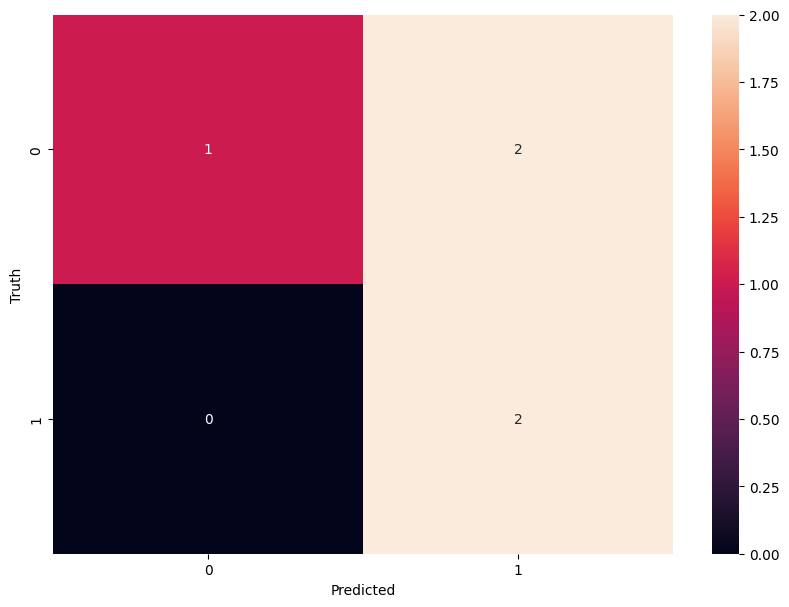

In [402]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# Excersice

In [403]:
titanic_data = pd.read_csv(r'C:\Users\shara\OneDrive\Desktop\data-science\data\titanic.csv')

In [404]:
titanic_data = titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

In [405]:
titanic_data.head(60)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,NaN,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708


In [406]:
age_mean = titanic_data.Age.mean()
age_mean

29.69911764705882

In [407]:
titanic_data.Age.fillna(age_mean, inplace=True)
titanic_data.head(60)

C:\Users\shara\AppData\Local\Temp\ipykernel_20700\3647960326.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data.Age.fillna(age_mean, inplace=True)


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.000000,7.2500
1,1,1,female,38.000000,71.2833
2,1,3,female,26.000000,7.9250
3,1,1,female,35.000000,53.1000
4,0,3,male,35.000000,8.0500
5,0,3,male,29.699118,8.4583
6,0,1,male,54.000000,51.8625
7,0,3,male,2.000000,21.0750
8,1,3,female,27.000000,11.1333
9,1,2,female,14.000000,30.0708


In [408]:
titanic_data.Sex = le.fit_transform(titanic_data.Sex)
titanic_data

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.000000,7.2500
1,1,1,0,38.000000,71.2833
2,1,3,0,26.000000,7.9250
3,1,1,0,35.000000,53.1000
4,0,3,1,35.000000,8.0500
...,...,...,...,...,...
886,0,2,1,27.000000,13.0000
887,1,1,0,19.000000,30.0000
888,0,3,0,29.699118,23.4500
889,1,1,1,26.000000,30.0000


In [409]:
xtrain, xtest, ytrain, ytest = train_test_split(titanic_data.drop('Survived', axis=1), titanic_data.Survived, test_size=0.3, random_state=10)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(623, 4) (268, 4) (623,) (268,)


In [410]:
titanic_model = tree.DecisionTreeClassifier()
titanic_model.fit(xtrain, ytrain)
prediction = titanic_model.predict(xtest)


In [411]:
cm = confusion_matrix(ytest, prediction)


Text(95.72222222222221, 0.5, 'Truth')

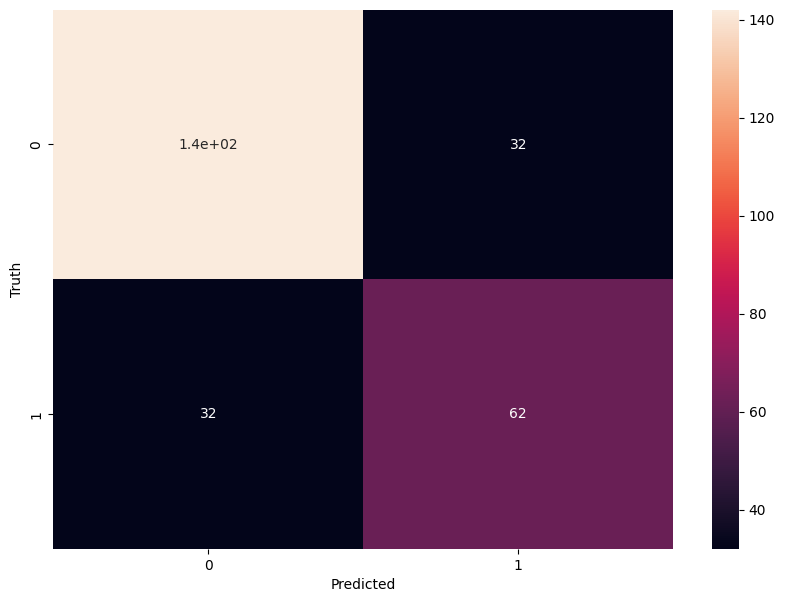

In [412]:
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [413]:
titanic_model.score(xtest, ytest)

0.7611940298507462